Дополнение к работе 3

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('CR_2.csv', sep=',')

In [3]:
df

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
0,32,m,38.5,52.5,7.7,22.1,6.93,12.1,69.0,0
1,32,m,38.5,70.3,18.0,24.7,11.17,15.6,76.5,0
2,32,m,46.9,74.7,36.2,52.6,8.84,33.2,79.3,0
3,32,m,43.2,52.0,30.6,22.6,7.33,33.8,75.7,0
4,32,m,39.2,74.1,32.6,24.8,9.15,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,5.57,650.9,68.5,1
611,64,f,24.0,102.8,2.9,44.4,1.54,35.9,71.3,1
612,64,f,29.0,87.3,3.5,99.0,1.66,64.2,82.0,1
613,46,f,33.0,NaN,39.0,62.0,3.56,50.0,71.0,1


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


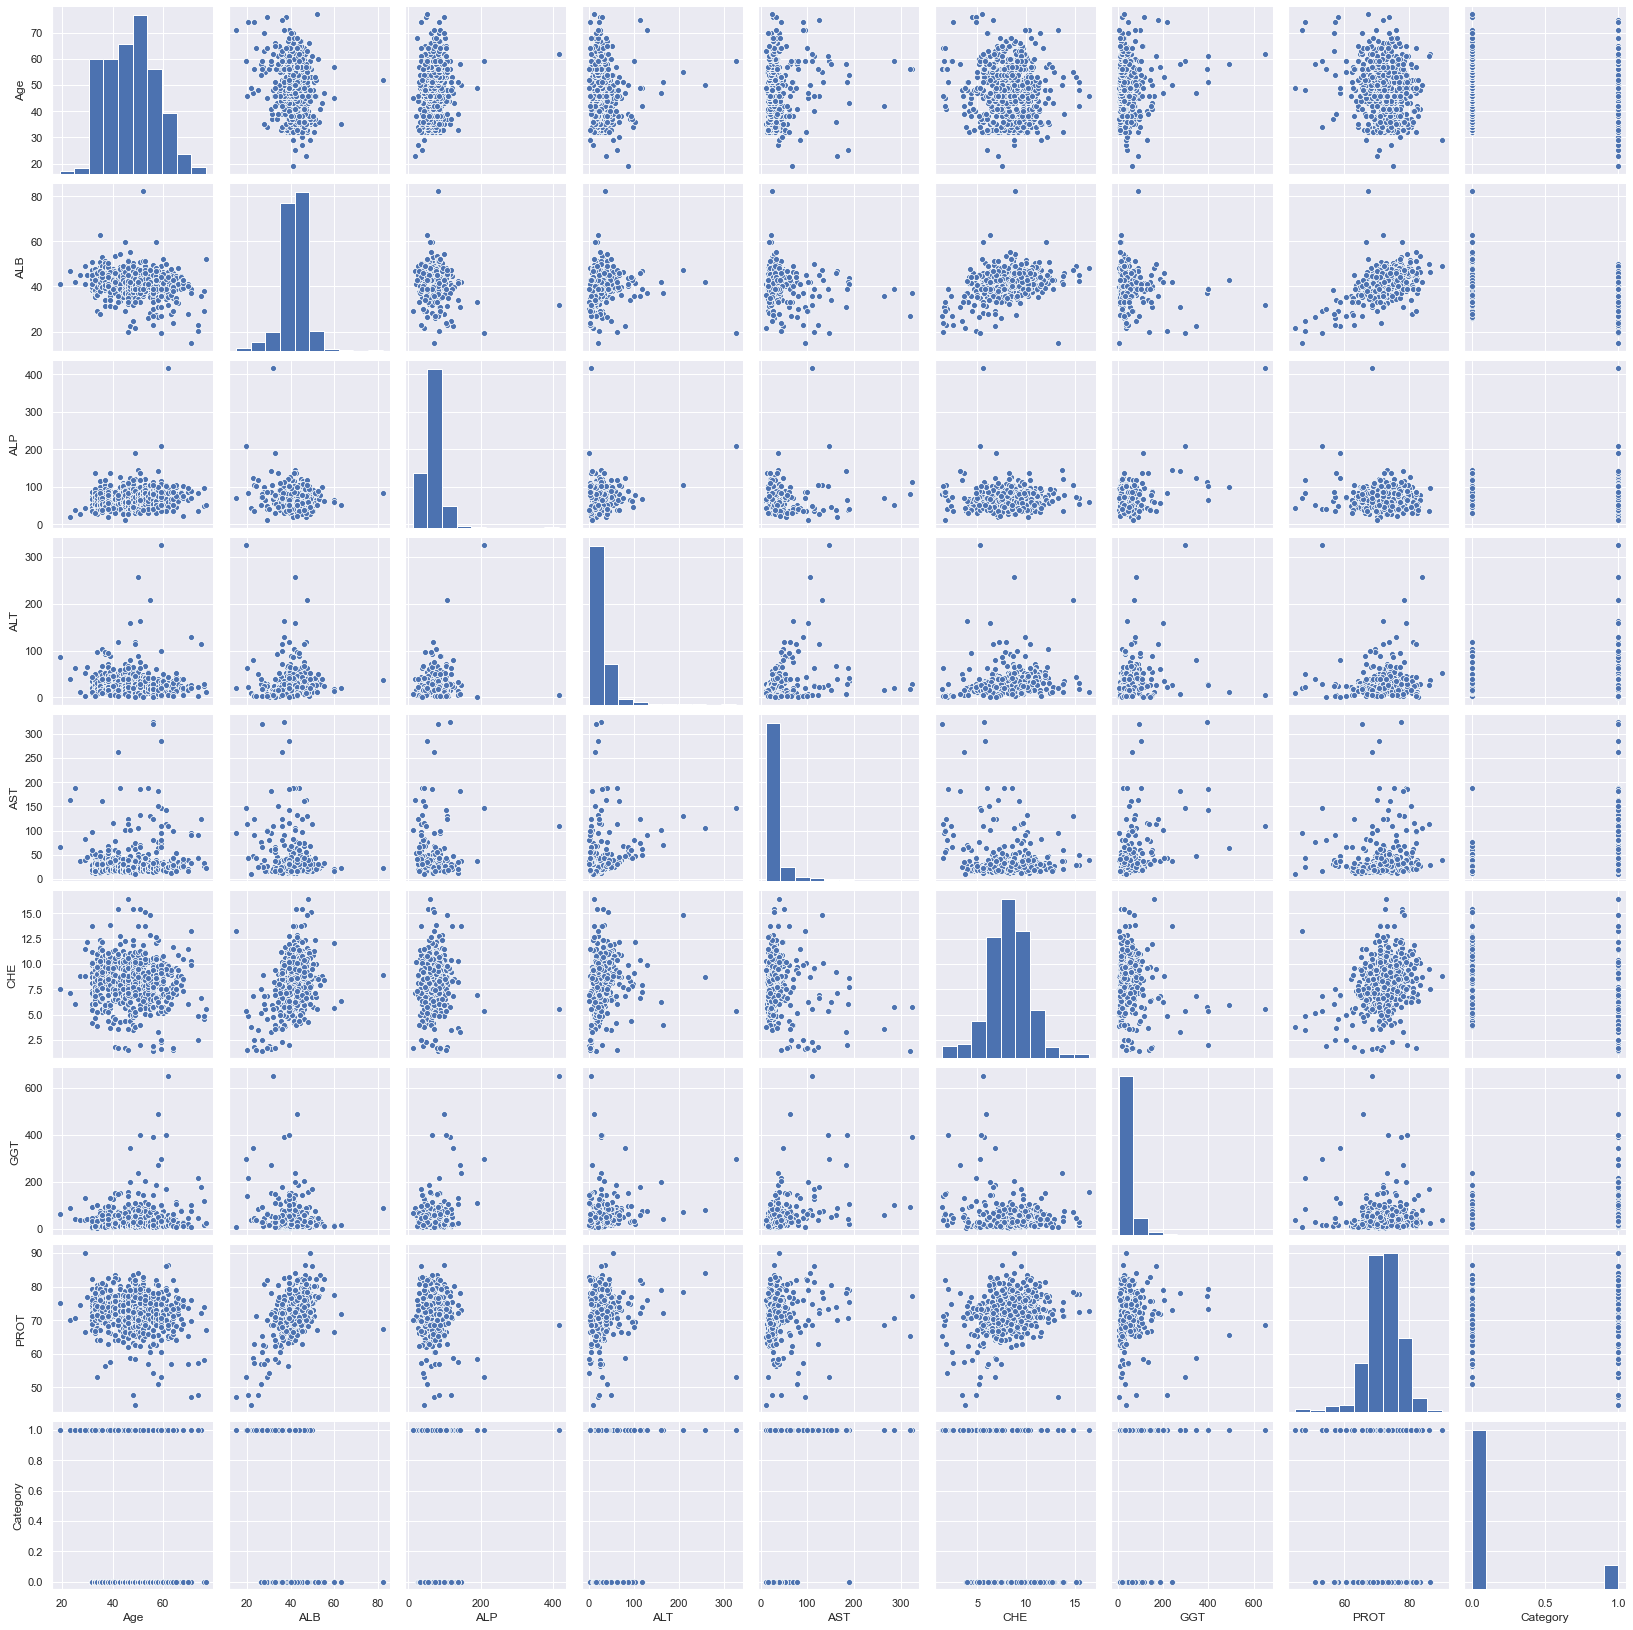

In [4]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

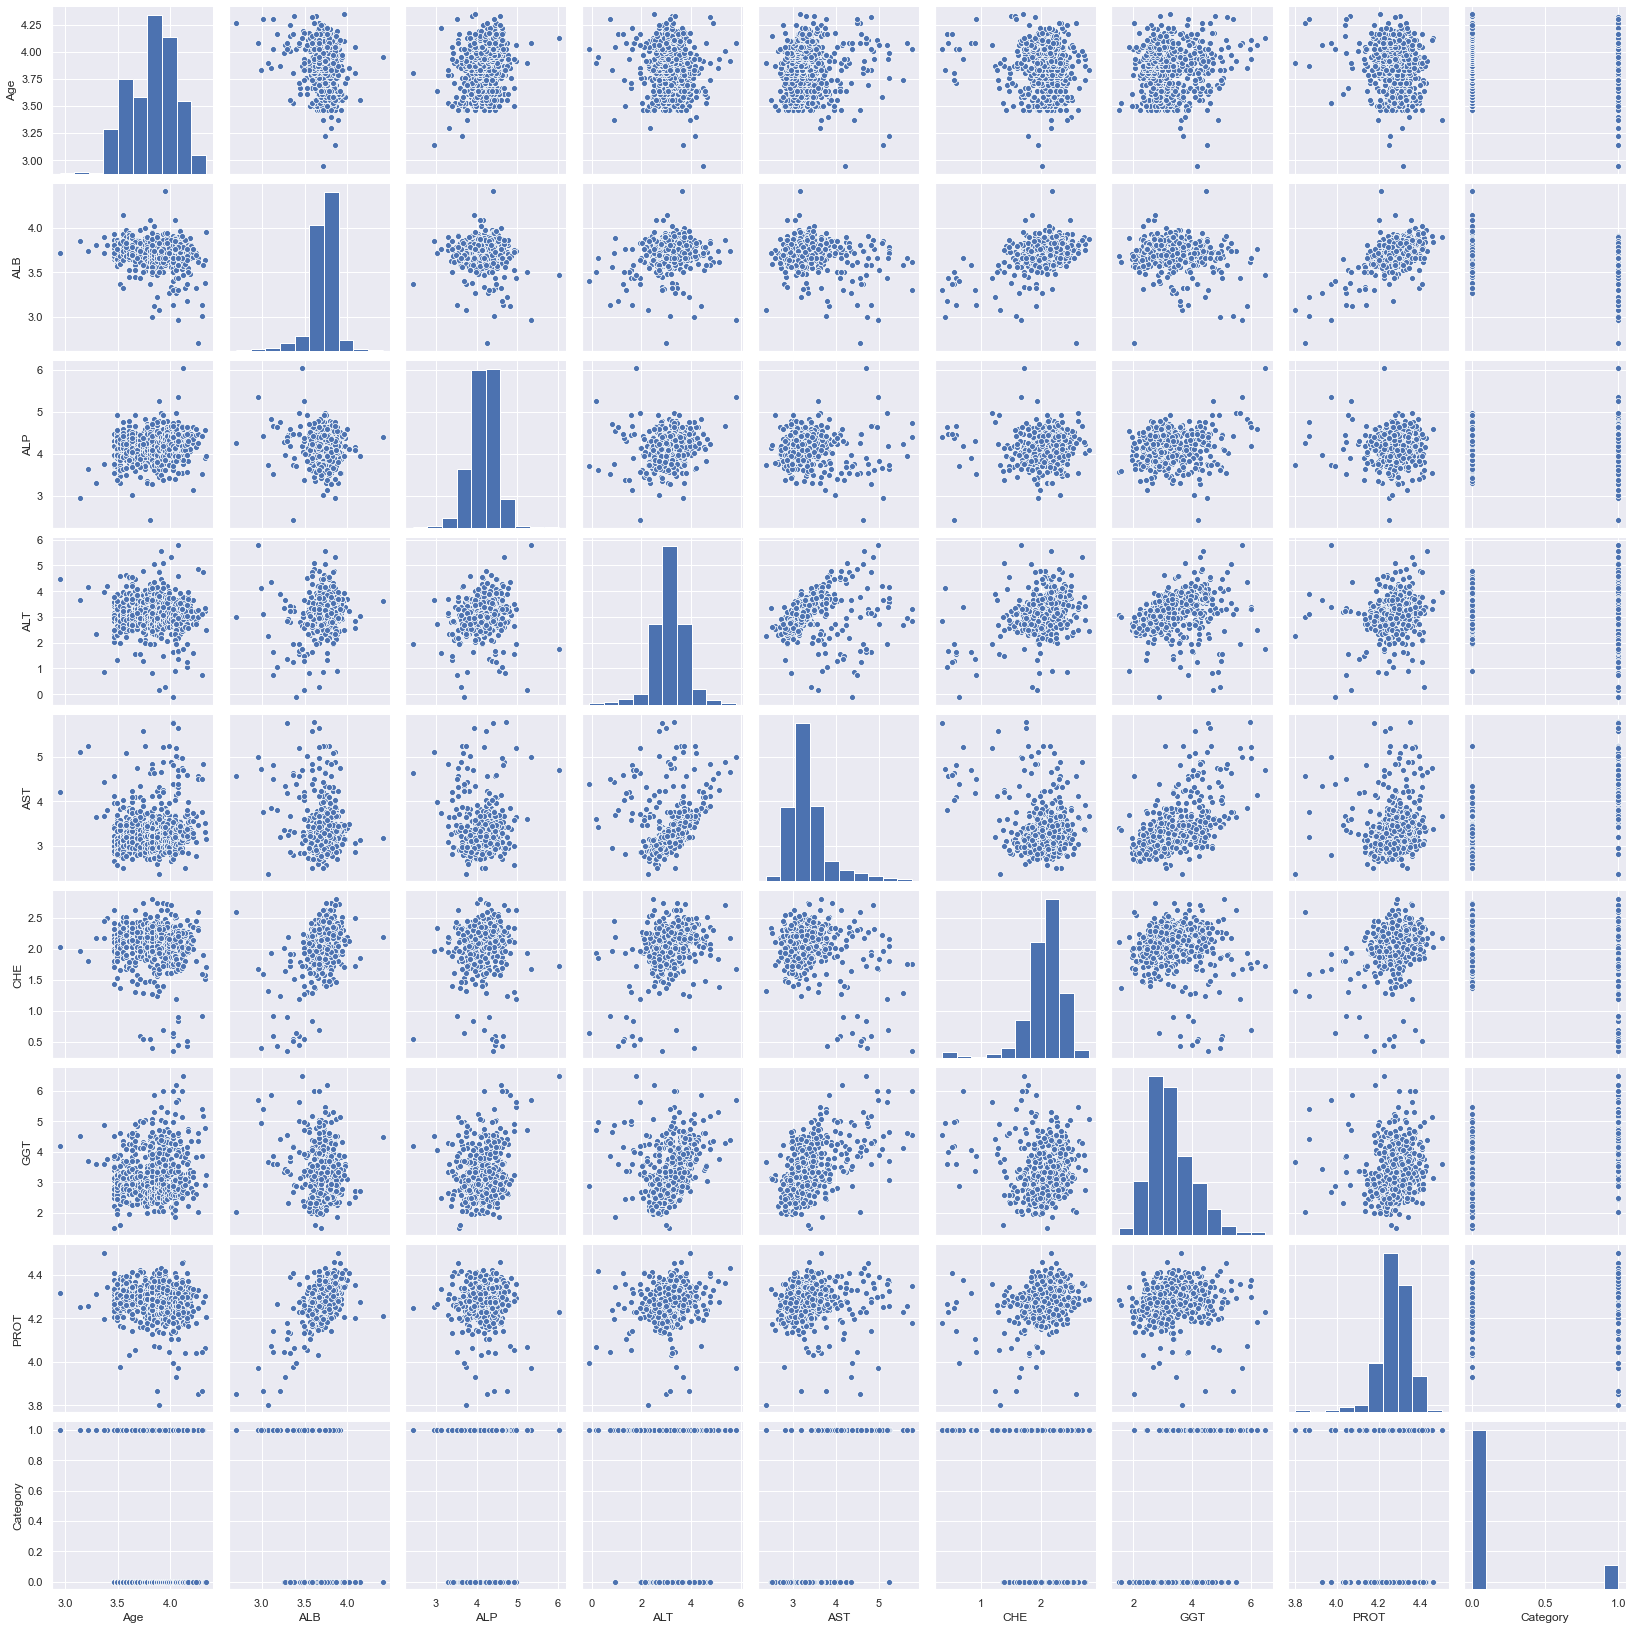

In [5]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['Age','ALB','ALP','ALT','AST','CHE','GGT','PROT']] = np.log(df_1[['Age','ALB','ALP','ALT','AST','CHE','GGT','PROT']])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

In [6]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ALP,18,0.029268
PROT,1,0.001626
ALT,1,0.001626
ALB,1,0.001626
Category,0,0.000000
GGT,0,0.000000
CHE,0,0.000000
AST,0,0.000000
Sex,0,0.000000
Age,0,0.000000


In [7]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

In [8]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

In [9]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.0
PROT,0,0.0
GGT,0,0.0
CHE,0,0.0
AST,0,0.0
ALT,0,0.0
ALP,0,0.0
ALB,0,0.0
Sex,0,0.0
Age,0,0.0


In [10]:
df.describe()

,Age,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,8.196634,39.533171,72.044137,0.133333
std,10.055105,5.775920,25.643955,25.448940,33.090690,2.205657,54.661071,5.398234,0.340211
min,19.000000,14.900000,11.300000,0.900000,10.600000,1.420000,4.500000,44.800000,0.000000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,6.935000,15.700000,69.300000,0.000000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,8.260000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,9.590000,40.200000,75.400000,0.000000
max,77.000000,82.200000,416.600000,325.300000,324.000000,16.410000,650.900000,90.000000,1.000000


In [11]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [12]:
# Encoding categorical data
df = encoding_char(df)

In [13]:
df

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
0,32.0,0,38.5,52.50000,7.7,22.1,6.93,12.1,69.0,0.0
1,32.0,0,38.5,70.30000,18.0,24.7,11.17,15.6,76.5,0.0
2,32.0,0,46.9,74.70000,36.2,52.6,8.84,33.2,79.3,0.0
3,32.0,0,43.2,52.00000,30.6,22.6,7.33,33.8,75.7,0.0
4,32.0,0,39.2,74.10000,32.6,24.8,9.15,29.9,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,32.0,416.60000,5.9,110.3,5.57,650.9,68.5,1.0
611,64.0,1,24.0,102.80000,2.9,44.4,1.54,35.9,71.3,1.0
612,64.0,1,29.0,87.30000,3.5,99.0,1.66,64.2,82.0,1.0
613,46.0,1,33.0,68.28392,39.0,62.0,3.56,50.0,71.0,1.0


In [14]:
df.dtypes

Age         float64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
CHE         float64
GGT         float64
PROT        float64
Category    float64
dtype: object

In [15]:
df.describe()

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,0.386992,41.620195,68.283920,28.450814,34.786341,8.196634,39.533171,72.044137,0.133333
std,10.055105,0.487458,5.775920,25.643955,25.448940,33.090690,2.205657,54.661071,5.398234,0.340211
min,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,1.420000,4.500000,44.800000,0.000000
25%,39.000000,0.000000,38.800000,52.950000,16.400000,21.600000,6.935000,15.700000,69.300000,0.000000
50%,47.000000,0.000000,41.900000,66.700000,23.000000,25.900000,8.260000,23.300000,72.200000,0.000000
75%,54.000000,1.000000,45.200000,79.300000,33.050000,32.900000,9.590000,40.200000,75.400000,0.000000
max,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,16.410000,650.900000,90.000000,1.000000


In [16]:
df

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
0,32.0,0,38.5,52.50000,7.7,22.1,6.93,12.1,69.0,0.0
1,32.0,0,38.5,70.30000,18.0,24.7,11.17,15.6,76.5,0.0
2,32.0,0,46.9,74.70000,36.2,52.6,8.84,33.2,79.3,0.0
3,32.0,0,43.2,52.00000,30.6,22.6,7.33,33.8,75.7,0.0
4,32.0,0,39.2,74.10000,32.6,24.8,9.15,29.9,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,32.0,416.60000,5.9,110.3,5.57,650.9,68.5,1.0
611,64.0,1,24.0,102.80000,2.9,44.4,1.54,35.9,71.3,1.0
612,64.0,1,29.0,87.30000,3.5,99.0,1.66,64.2,82.0,1.0
613,46.0,1,33.0,68.28392,39.0,62.0,3.56,50.0,71.0,1.0


In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Age','Sex','ALB','ALP','ALT','AST','CHE','GGT','PROT','Category']).round()

,Age,Sex,ALB,ALP,ALT,AST,CHE,GGT,PROT,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
610,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
611,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
612,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
613,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Используем способ дерева решений или дендрограммы для определения количества кластеров

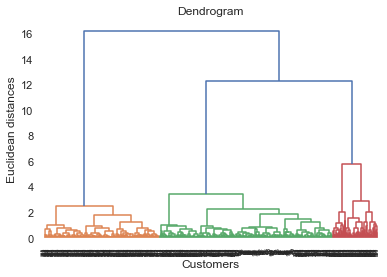

In [19]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Как видим, тут четко можно выделить три кластера, что может указывать на правильность нашего окончательного выбора в основной работе.

Проведем деление на 3 кластера.

In [20]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [23]:
hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Оставим такую выборку параметров, как более значимых

Итог: как видим по данному методу нашу выборку тоже можно разделить на три кластера, что может говорить о правильности наших действий. 